In [1]:
import os
from nilearn import plotting
from nilearn.image import load_img, resample_to_img
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import matplotlib as mpl

In [2]:
# Directory for saving figures
figures_dir = '/Users/hugofluhr/Library/CloudStorage/OneDrive-UniversitätZürichUZH/PhD/studies/LearningHabits/output/figures/2026-02-lab-meeting'

In [3]:
# Loading the background image
# average T1w of our sample
#avg_T1_path = '/Users/hugofluhr/phd_local/data/LearningHabits/dev_sample/average_T1w.nii'
avg_T1_path = '/Users/hugofluhr/phd_local/data/LearningHabits/dev_sample/avg_T1w/masked_avg_T1.nii'
avg_T1 = load_img(avg_T1_path)

In [4]:
mask_dir = '/Users/hugofluhr/phd_local/data/LearningHabits/dev_sample/masks/MNI152NLin2009cAsym'
mask_files = [os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith('.nii')]

In [5]:
masks = {}
for mask_file in mask_files:
    roi_name = (os.path.basename(mask_file)).split('_')[0]
    mask_img = load_img(mask_file)
    masks[roi_name] = mask_img

# Q-value ROIs

/Users/hugofluhr/miniforge3/envs/neuroim/lib/python3.10/site-packages/numpy/ma/core.py:2892: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


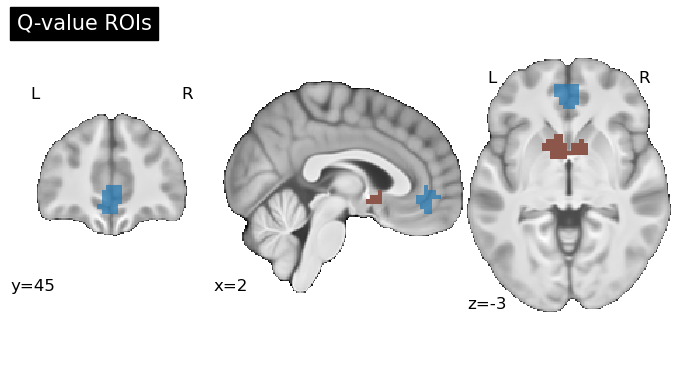

In [6]:
# Use tab10 colormap for ROI colors
roi_colors = [cm.tab10(i) for i in range(10)]
roi_cmps = [ListedColormap([c]) for c in roi_colors]

# Q-value ROI plot
display = plotting.plot_roi(
    masks['vmpfc'],
    bg_img=avg_T1,
    black_bg=False,
    title='Q-value ROIs',
    display_mode='ortho',
    draw_cross=False,
    cut_coords=(2, 45, -3),
    cmap=roi_cmps[0],
    dim=0
)

display.add_overlay(
    masks['striatum'],
    cmap=roi_cmps[5]
)

display.savefig(
    f"{figures_dir}/Q_value_ROIs.png",
    dpi=600
)

plotting.show()

# H-value ROIs

In [ ]:
# First ROI (creates the figure)
display = plotting.plot_roi(
    masks['habit'],
    bg_img=avg_T1,
    title='H-value ROIs',
    black_bg=False,
    display_mode='ortho',
    draw_cross=False,
    cmap=roi_cmps[2],
    dim=0
)

# Second ROI: Parietal
display.add_overlay(
    masks['parietal'],
    cmap=roi_cmps[8]
)

# Third ROI: Motor
display.add_overlay(
    masks['motor'],
    cmap=roi_cmps[4]
)

display.savefig(
    f"{figures_dir}/H_value_ROIs.png",
    dpi=600
)

plotting.show()

# GLM1


## First stim x Qval

In [14]:
glm1_first_stim_x_Qval = '/Users/hugofluhr/phd_local/data/LearningHabits/spm_outputs_noSDC/glm2_all_runs_scrubbed_2025-12-11-12-44/second-lvl/first_stimxqval/spmT_0001.nii'

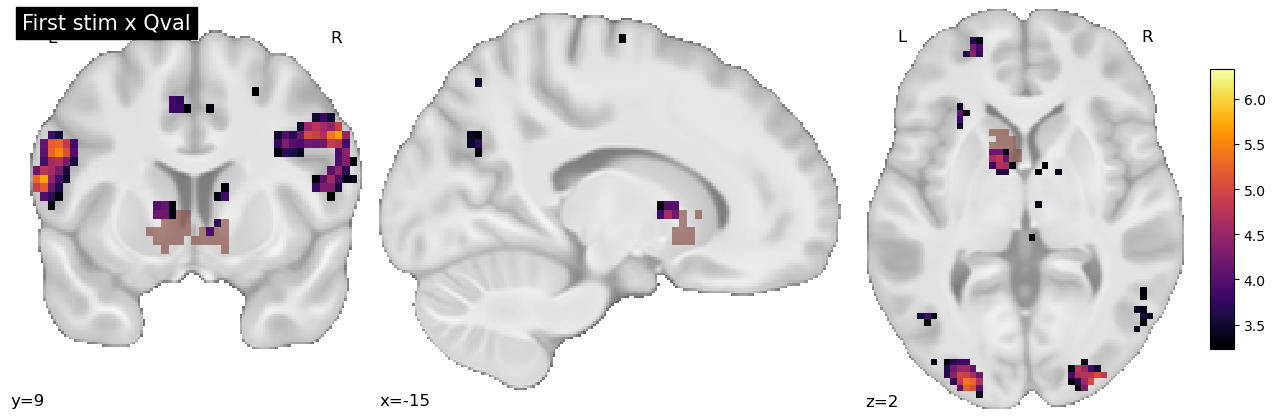

In [23]:
fig = plt.figure(figsize=(12, 4))

display = plotting.plot_anat(
    avg_T1,
    black_bg=False,
    title="First stim x Qval",
    display_mode="ortho",
    draw_cross=False,
    cut_coords=(-15, 9, 2),
    threshold=200,
    dim='auto',
    figure=fig
)

display.add_overlay(
    masks["striatum"],
    cmap=roi_cmps[5],
    alpha=0.7,
)

display.add_overlay(
    glm1_first_stim_x_Qval,
    vmin=3.23,
    vmax=6.33,
    colorbar=False,
    cmap='inferno'
)


cax = fig.add_axes([1, 0.15, 0.02, 0.70])  # [left, bottom, width, height]
norm = mpl.colors.Normalize(vmin=3.23, vmax=6.33)
cb = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.inferno, norm=norm)


plotting.show()

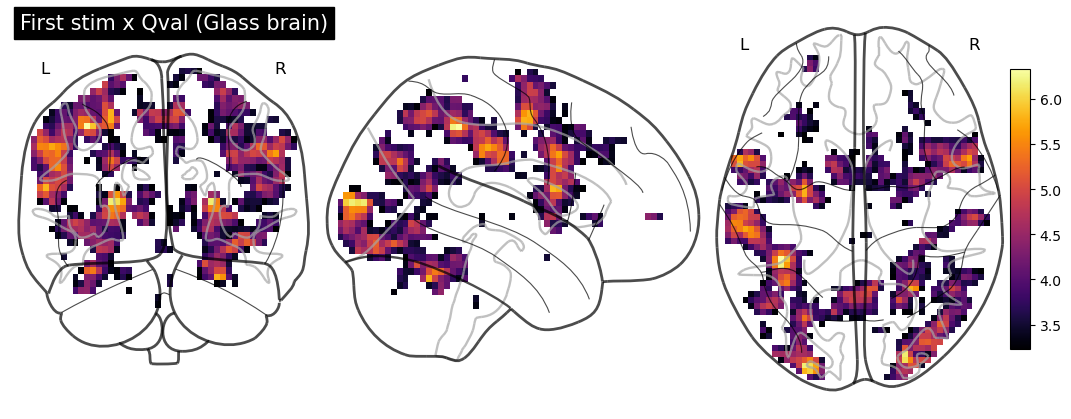

In [42]:
# Glass brain
fig = plt.figure(figsize=(10, 4))

display = plotting.plot_glass_brain(
    glm1_first_stim_x_Qval,
    black_bg=False,
    title="First stim x Qval (Glass brain)",
    display_mode="ortho",
    figure=fig,
    vmin=3.23,
    vmax=6.33,
    cmap='inferno',
)

cax = fig.add_axes([1, 0.15, 0.02, 0.70])  # [left, bottom, width, height]
norm = mpl.colors.Normalize(vmin=3.23, vmax=6.33)
cb = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.inferno, norm=norm)

plotting.show()

## Second stim x Hval

In [7]:
glm1_second_stim_x_Hval = '/Users/hugofluhr/phd_local/data/LearningHabits/spm_outputs_noSDC/glm2_all_runs_scrubbed_2025-12-11-12-44/second-lvl/second_stimxhval/spmT_0001.nii'

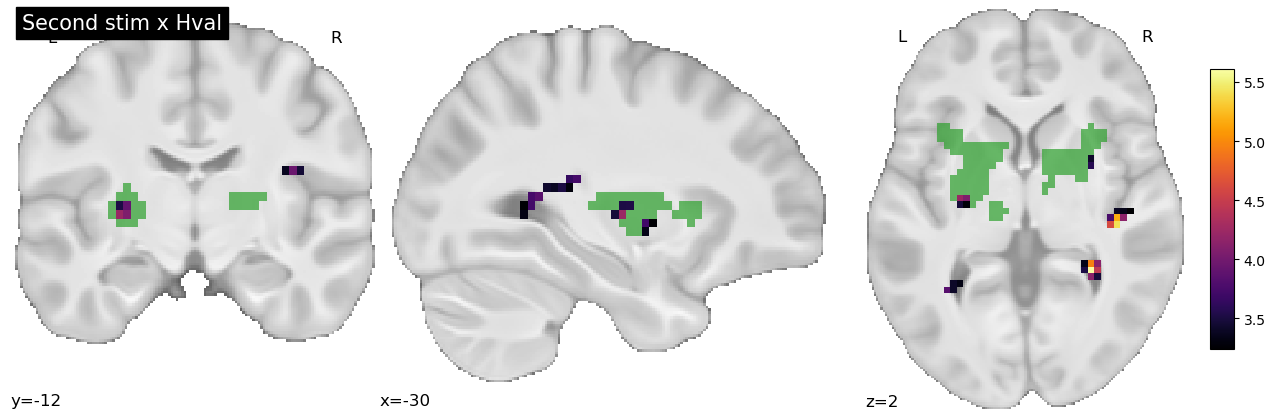

In [22]:
fig = plt.figure(figsize=(12, 4))

display = plotting.plot_anat(
    avg_T1,
    black_bg=False,
    title="Second stim x Hval",
    display_mode="ortho",
    draw_cross=False,
    cut_coords=(-30, -12, 2),
    threshold=200,
    dim='auto',
    figure=fig
)

display.add_overlay(
    masks["habit"],
    cmap=roi_cmps[2],
    alpha=0.7,
)

display.add_overlay(
    glm1_second_stim_x_Hval,
    vmin=3.24,
    vmax=5.61,
    colorbar=False,
    cmap='inferno'
)


cax = fig.add_axes([1, 0.15, 0.02, 0.70])  # [left, bottom, width, height]
norm = mpl.colors.Normalize(vmin=3.24, vmax=5.61)
cb = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.inferno, norm=norm)

plotting.show()

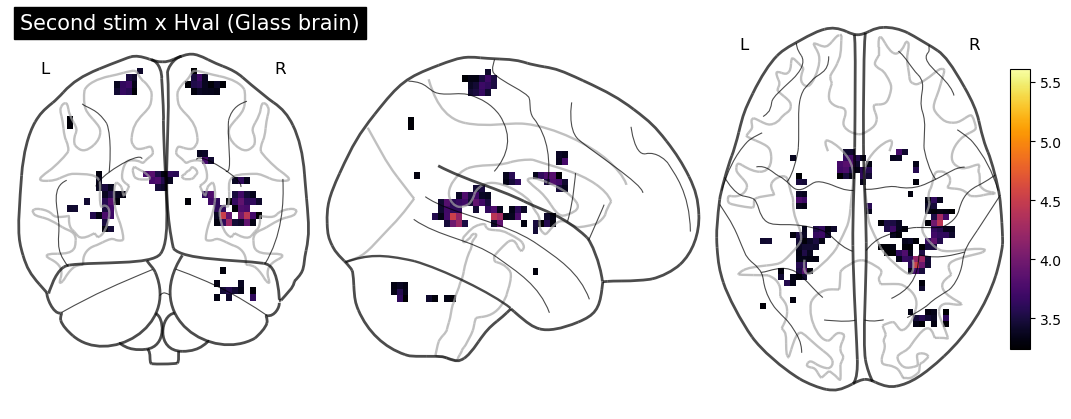

In [35]:
# handle negative values if any
from nilearn.image import math_img
pos_img = math_img(
    "np.where(img > 0, img, 0)",
    img=glm1_second_stim_x_Hval
)

# Glass brain
fig = plt.figure(figsize=(10, 4))

display = plotting.plot_glass_brain(
    pos_img,
    black_bg=False,
    title="Second stim x Hval (Glass brain)",
    display_mode="ortho",
    figure=fig,
    threshold=3.24,
    vmin=3.24,
    vmax=7.61,
    cmap='inferno',
)

cax = fig.add_axes([1, 0.15, 0.02, 0.70])  # [left, bottom, width, height]
norm = mpl.colors.Normalize(vmin=3.24, vmax=5.61)
cb = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.inferno, norm=norm)

plotting.show()

# GLM2


## Chosen stim x Qval

In [18]:
glm2_chosen_x_Qval = '/Users/hugofluhr/phd_local/data/LearningHabits/spm_outputs_noSDC/glm2_chosen_all_runs_scrubbed_2025-12-11-11-22/second-lvl/second_stimxqval_chosen/spmT_0001.nii'

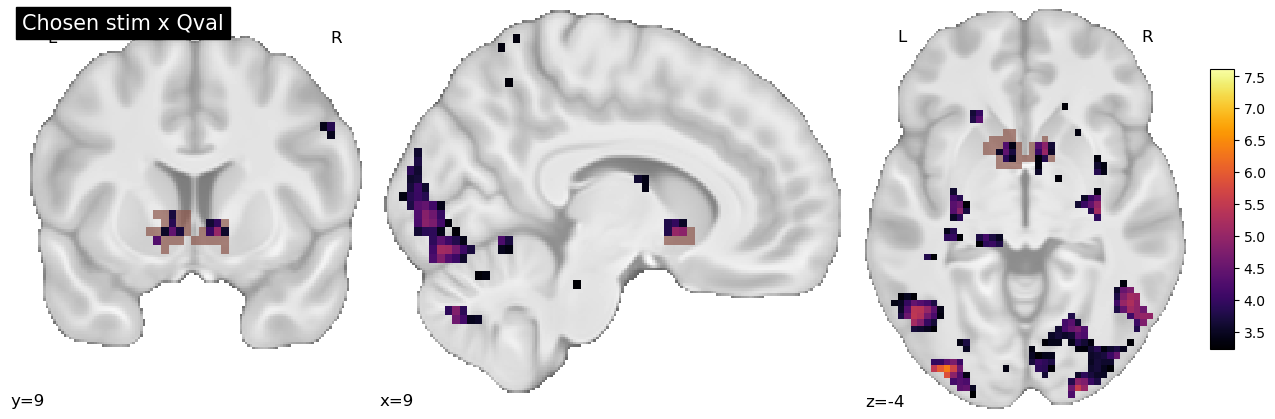

In [50]:
fig = plt.figure(figsize=(12, 4))

display = plotting.plot_anat(
    avg_T1,
    black_bg=False,
    title="Chosen stim x Qval",
    display_mode="ortho",
    draw_cross=False,
    cut_coords=(9, 9, -4),
    threshold=200,
    dim='auto',
    figure=fig
)

display.add_overlay(
    masks["striatum"],
    cmap=roi_cmps[5],
    alpha=0.7,
)

display.add_overlay(
    glm2_chosen_x_Qval,
    vmin=3.23,
    vmax=7.61,
    colorbar=False,
    cmap='inferno'
)

cax = fig.add_axes([1, 0.15, 0.02, 0.70])  # [left, bottom, width, height]
norm = mpl.colors.Normalize(vmin=3.23, vmax=7.61)
cb = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.inferno, norm=norm)


plotting.show()

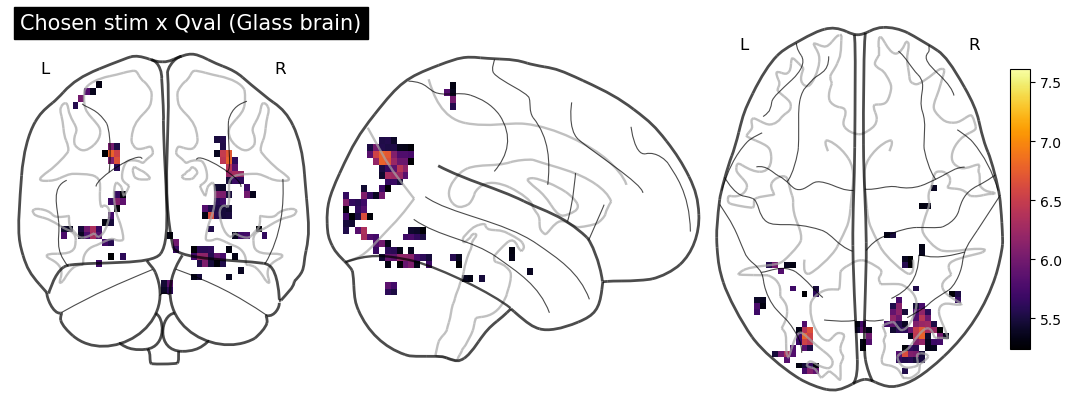

In [ ]:
# handle negative values if any
from nilearn.image import math_img
pos_img = math_img(
    "np.where(img > 0, img, 0)",
    img=glm2_chosen_x_Qval
)


# Glass brain
fig = plt.figure(figsize=(10, 4))

display = plotting.plot_glass_brain(
    pos_img,
    black_bg=False,
    title="Chosen stim x Qval (Glass brain)",
    display_mode="ortho",
    figure=fig,
    threshold=3.24,
    vmin=3.24,
    vmax=7.61,
    cmap='inferno',
)

cax = fig.add_axes([1, 0.15, 0.02, 0.70])  # [left, bottom, width, height]
norm = mpl.colors.Normalize(vmin=3.24, vmax=7.61)
cb = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.inferno, norm=norm)

plotting.show()

In [26]:
glm2_chosen_x_Hval = '/Users/hugofluhr/phd_local/data/LearningHabits/spm_outputs_noSDC/glm2_chosen_all_runs_scrubbed_2025-12-11-11-22/second-lvl/second_stimxhval_chosen/spmT_0001.nii'

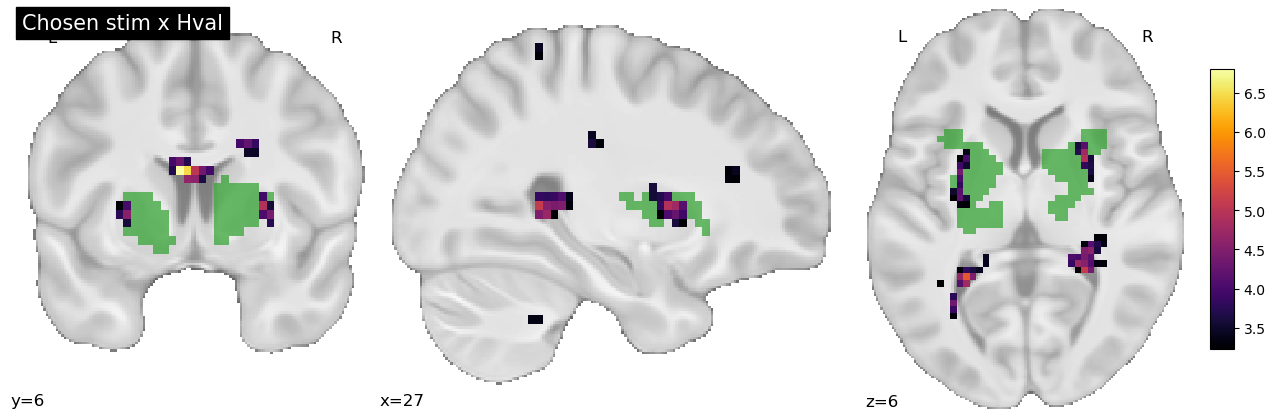

In [29]:
fig = plt.figure(figsize=(12, 4))

display = plotting.plot_anat(
    avg_T1,
    black_bg=False,
    title="Chosen stim x Hval",
    display_mode="ortho",
    draw_cross=False,
    cut_coords=(27, 6, 6),
    threshold=200,
    dim='auto',
    figure=fig
)

display.add_overlay(
    masks["habit"],
    cmap=roi_cmps[2],
    alpha=0.7,
)

display.add_overlay(
    glm2_chosen_x_Hval,
    vmin=3.23,
    vmax=6.8,
    colorbar=False,
    cmap='inferno'
)

cax = fig.add_axes([1, 0.15, 0.02, 0.70])  # [left, bottom, width, height]
norm = mpl.colors.Normalize(vmin=3.23, vmax=6.8)
cb = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.inferno, norm=norm)


plotting.show()

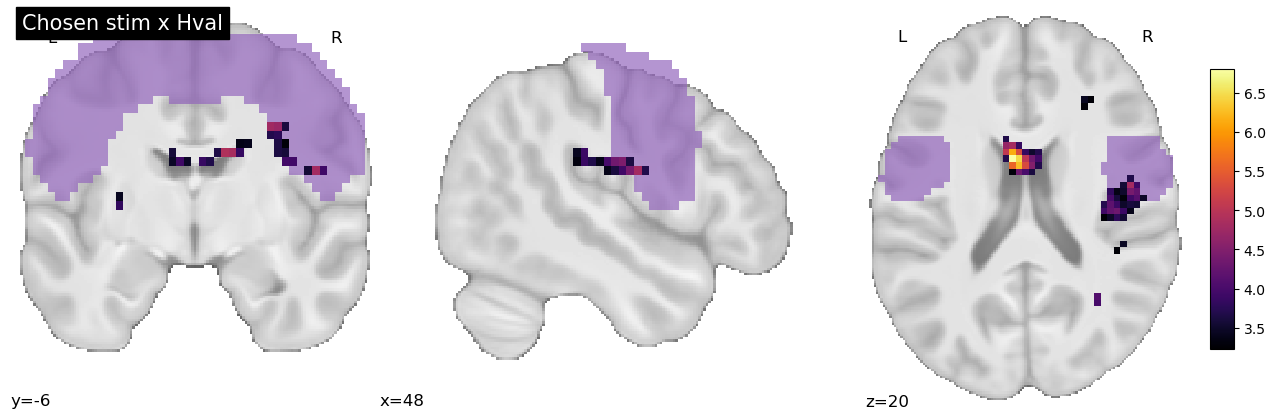

In [31]:
fig = plt.figure(figsize=(12, 4))

display = plotting.plot_anat(
    avg_T1,
    black_bg=False,
    title="Chosen stim x Hval",
    display_mode="ortho",
    draw_cross=False,
    cut_coords=(48, -6, 20),
    threshold=200,
    dim='auto',
    figure=fig
)

display.add_overlay(
    masks["motor"],
    cmap=roi_cmps[4],
    alpha=0.7,
)

display.add_overlay(
    glm2_chosen_x_Hval,
    vmin=3.23,
    vmax=6.8,
    colorbar=False,
    cmap='inferno'
)

cax = fig.add_axes([1, 0.15, 0.02, 0.70])  # [left, bottom, width, height]
norm = mpl.colors.Normalize(vmin=3.23, vmax=6.8)
cb = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.inferno, norm=norm)


plotting.show()

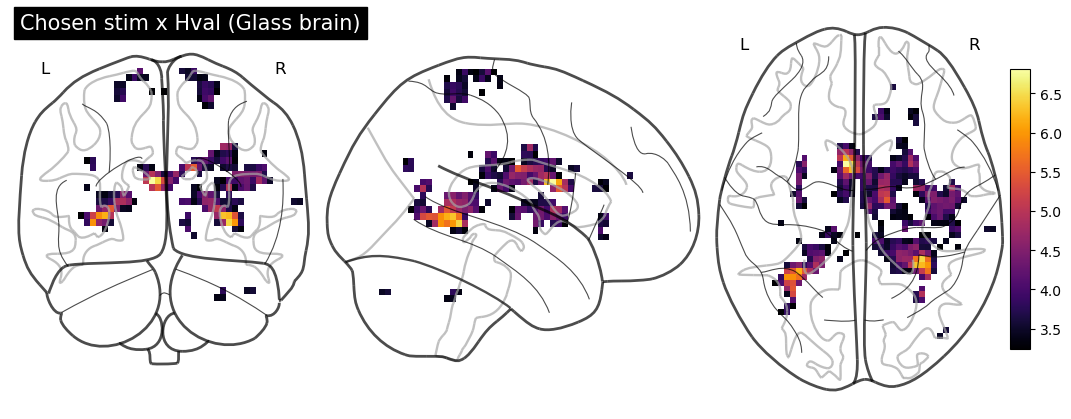

In [52]:
# handle negative values if any
from nilearn.image import math_img
pos_img = math_img(
    "np.where(img > 0, img, 0)",
    img=glm2_chosen_x_Hval
)


# Glass brain
fig = plt.figure(figsize=(10, 4))

display = plotting.plot_glass_brain(
    pos_img,
    black_bg=False,
    title="Chosen stim x Hval (Glass brain)",
    display_mode="ortho",
    figure=fig,
    threshold=3.24,
    vmin=3.24,
    vmax=6.81,
    cmap='inferno',
)

cax = fig.add_axes([1, 0.15, 0.02, 0.70])  # [left, bottom, width, height]
norm = mpl.colors.Normalize(vmin=3.24, vmax=6.81)
cb = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.inferno, norm=norm)

plotting.show()